### data vernacular names, exploration
by Christian,

- those data './vernacular_name.csv' were genererated by notebook vernacular_name_spark.ipyn, thank's to Tim


In [11]:
import pandas as pd
import matplotlib.pyplot as plt 

In [50]:
# load vernacular names dataset
df = pd.read_csv('./vernacular_name.csv', sep=',')
print(df.info())
df.dropna(subset = ["vernacular_name"], inplace=True)
display(df.head())
df['len_vernacular_name'] = df['vernacular_name'].apply(lambda x: len(str(x)))
print(df['len_vernacular_name'].describe())
df[df['len_vernacular_name']==3].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123847 entries, 0 to 123846
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   _c0              123845 non-null  object
 1   name             120247 non-null  object
 2   summary          26905 non-null   object
 3   vernacular_name  26905 non-null   object
dtypes: object(4)
memory usage: 3.8+ MB
None


,_c0,name,summary,vernacular_name
0,0,Cintractiellaceae,The Cintractiellaceae are a family of smut fun...,fungus
1,1,Wallemiaceae,The Wallemiomycetes are a class of fungi in th...,fungi
2,2,Kineosporiaceae,The Kineosporiaceae comprise a polyphyletic Ac...,order
6,6,Geodermatophilaceae,The Geodermatophilaceae are an actinomycete fa...,Frankineae
7,7,Tremellaceae,The Tremellaceae are a family of fungi in the ...,fungi


count    26905.000000
mean         6.310946
std          1.916471
min          1.000000
25%          6.000000
50%          6.000000
75%          6.000000
max         21.000000
Name: len_vernacular_name, dtype: float64


,_c0,name,summary,vernacular_name,len_vernacular_name
275,134,Chunellidae,"Chunellidae is a family of sea pens, a member ...",pen,3
614,395,Parabrotulidae,"The Parabrotulidae, the false brotulas, are a ...",eel,3
692,406,Gymnarchidae,Gymnarchus niloticus – commonly known as the a...,aba,3
735,Glaresis was originally classified with Trogid...,"and has many characteristics of """"primitive""""...",but no affinities to any of the other primiti...,any,3
756,Dating from the upper Cretaceous,the centropomids are of typical percoid shape,distinguished by having two-part dorsal fins,fin,3


In [24]:
df[df['len_vernacular_name']==2].head()

,_c0,name,summary,vernacular_name,len_vernacular_name
595,They are commonly known as the broad-winged da...,demoiselles,or jewelwings. These rather large damselflies...,mm,2
809,It is a large,ellipsoidal fish,growing to 200 cm (79 in) long,cm,2
1809,Around two hundred and fifty species of hetero...,87 species are known from the New World,including 34 from the United States.Variegate...,34,2
2199,1280,Acartophthalmidae,The Acartophthalmidae are a family of very sma...,mm,2
3215,H. palmyra Polhemus,J. T. & Polhemus,D. A.,A.,2


In [27]:
# we keep name with more than 2 cars
df = df[df['len_vernacular_name']>2]
df.drop(['len_vernacular_name'], axis=1)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26591 entries, 0 to 26590
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   _c0                  26590 non-null  object
 1   name                 26591 non-null  object
 2   summary              26591 non-null  object
 3   vernacular_name      26591 non-null  object
 4   len_vernacular_name  26591 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [28]:

dg = df.groupby('vernacular_name')['name'].count().sort_values(ascending=False)
display(dg)

vernacular_name
beetle        15616
fungi           513
millipede       341
plant           288
fish            277
              ...  
chimaera          1
chimney           1
chio              1
chironomid        1
ὕδωρ              1
Name: name, Length: 2544, dtype: int64

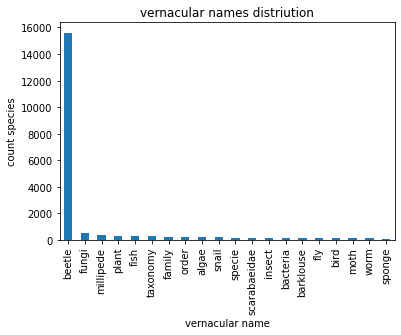

In [29]:
ax = dg.head(20).plot(kind='bar', title='vernacular names distribution')
ax.set(xlabel='vernacular name', ylabel='count species')
plt.show()

In [47]:
dg.describe()

count     2544.000000
mean        10.452437
std        310.142915
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max      15616.000000
Name: name, dtype: float64

#### - what would it be, on top of this list without the "15616 species of beetle"


vernacular_name
fungi           513
millipede       341
plant           288
fish            277
taxonomy        247
family          232
order           217
algae           182
snail           169
specie          134
scarabaeidae    134
insect          132
bacteria        131
barklouse       113
fly             109
bird            104
moth             99
worm             94
Name: name, dtype: int64

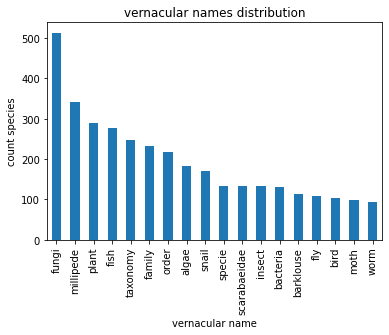

In [48]:

display(dg[1:19])
ax = dg[1:19].plot(kind='bar', title='vernacular names distribution')
ax.set(xlabel='vernacular name', ylabel='count species')
plt.show()

- from this dataset we will have to filter few names as "family, specie, order"